# 1. Random Forest
>In this notebook, I have implemented the **Random Search and Grid Search** hyperparameter tuning methods. This is the same notebook from previous task where I implemented **Logistic Regression** on titanic dataset, now I have changed the **Classification Algorithm** from **Logistic Regression to Random Forest**.
>
>I have refrenced this medium article for this task [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74/).
>
>Also the referenced notebook from the same article [Improving Random Forest Part 2.ipynb](https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb). The referenced noteook uses **Random Forest Regression Algorithm**.

### Dataset Used: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

##  1.1. Load Dataset

In [2]:
titanic_df = pd.read_csv("titanic/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2. Data Exploration 

In [3]:
# Show the shape of titanic dataset
titanic_df.shape

(891, 12)

In [4]:
# Show the cloumns of the titanic dataset
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Show data types
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Show info about dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Show count of null values in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1.3. Data Preprocessing and Visualization

In [9]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
# check null values in age column
titanic_df['Age'].isnull().sum()

np.int64(177)

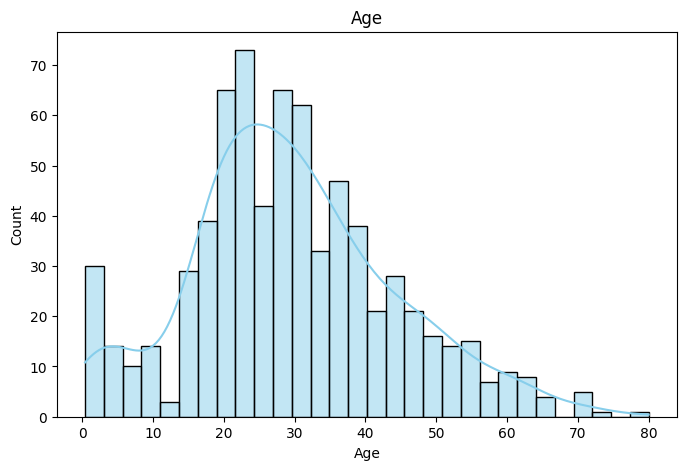

In [11]:
# Plot histogram of 'Age' column
plt.figure(figsize=(8,5))
sns.histplot(titanic_df['Age'], kde=True, bins=30, color='skyblue')
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

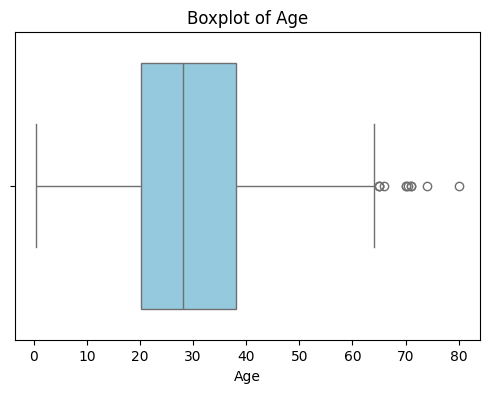

In [12]:
# Plot box plot of 'Age' column to check for outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=titanic_df['Age'], color='skyblue')
plt.title("Boxplot of Age")
plt.show()

In [13]:
# Handle missing value in 'Age' column with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [14]:
titanic_df['Age'].isnull().sum()

np.int64(0)

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [17]:
titanic_df['Cabin'].isnull().sum()

np.int64(687)

In [18]:
# Almost all values in cabin is null, so dropping this cloumn
titanic_df.drop(columns=['Cabin'], inplace=True)

In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


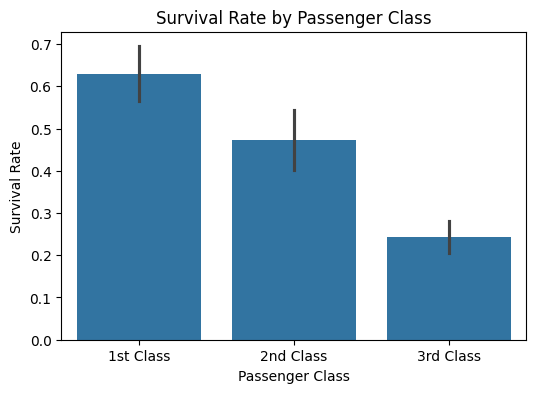

In [20]:
# Plot survival rate by class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks([0,1,2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

In [21]:
titanic_df.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.028233,12.499986,1.00,23.0,28.0,35.0,74.0
1,342.0,28.291433,13.764425,0.42,21.0,28.0,35.0,80.0


In [22]:
# Separate data into two groups based on survival status
survived = titanic_df[titanic_df['Survived'] == 1]
not_survived = titanic_df[titanic_df['Survived'] == 0]

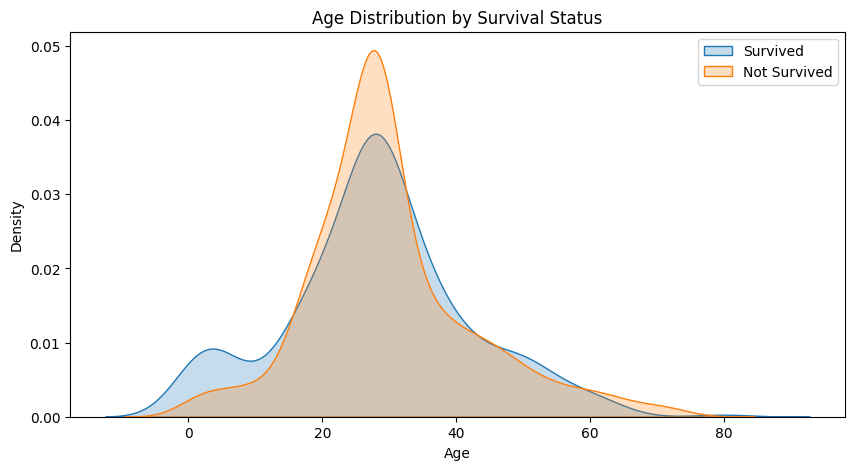

In [23]:
# Visualize the age distribution using a KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data=survived, x='Age', fill=True, label='Survived')
sns.kdeplot(data=not_survived, x='Age', fill=True, label='Not Survived')

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

In [24]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace = True)
titanic_df.loc[titanic_df['Sex']=='male','Sex'] = 1
titanic_df.loc[titanic_df['Sex']=='female', 'Sex'] = 0

In [27]:
X = titanic_df.drop("Survived", axis = 1, inplace = False)
y = titanic_df["Survived"]

In [28]:
scaler= StandardScaler()
scaler.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [30]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

## 1.4.Model Training

In [31]:
Rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
Rf_classifier.fit(scaled_X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 1.5. Model Evaluation 

In [32]:
y_pred= Rf_classifier.predict(scaled_X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8212290502793296


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.84      0.74      0.79        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.82      0.82      0.82       179



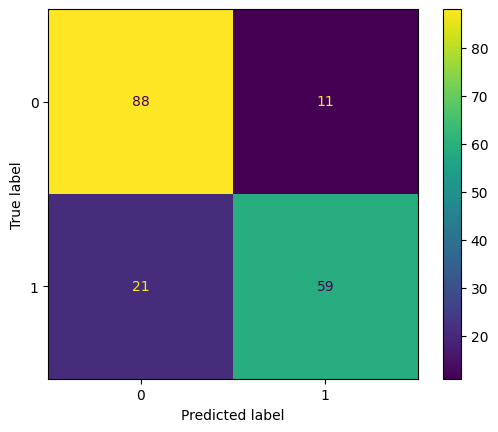

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

# 2. Examine the Default Random Forest to Determine Parameters 

In [36]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(Rf_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# 3. Random Search with Cross Validation 

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
Rf_classifier = RandomForestClassifier(random_state = 42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
Rf_random = RandomizedSearchCV(estimator=Rf_classifier, param_distributions=random_grid,
                               n_iter = 100, scoring='accuracy',
                               cv = 3, verbose=2, random_state=42, n_jobs=-1,
                               return_train_score=True)


# Fit the random search model
Rf_random.fit(scaled_X_train,y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [39]:
Rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 30,
 'bootstrap': True}

In [40]:
Rf_random.cv_results_

{'mean_fit_time': array([2.00602277, 1.90606356, 0.76716797, 0.69826937, 1.84269126,
        0.17245722, 0.53594764, 1.60495305, 1.4625899 , 1.43419902,
        1.05432558, 0.38398019, 1.53060699, 0.83691708, 1.69205014,
        1.29612557, 2.11269577, 0.35463039, 1.05826489, 0.17266027,
        0.40064208, 0.88410211, 1.11802141, 1.65229019, 0.20643663,
        1.23157732, 0.21266476, 0.40451686, 0.17171431, 1.3197066 ,
        1.97695883, 0.54896156, 0.41279531, 1.28194658, 1.5287226 ,
        1.61730846, 1.46998731, 0.56509693, 0.63672988, 1.88941216,
        0.35417024, 1.85148279, 1.13907051, 0.21795559, 0.71254977,
        0.72442627, 0.7351257 , 0.83441432, 1.71248317, 0.34880527,
        2.10478814, 1.27614331, 0.89695152, 1.71143913, 1.06237268,
        1.22879926, 1.75998481, 0.45496996, 2.24171464, 1.08507713,
        0.87815698, 2.04154547, 0.90159599, 0.2125268 , 0.21889822,
        1.49721177, 1.54688621, 1.22897156, 1.57962147, 2.25053255,
        1.68232377, 0.70075774,

# 4. Random Search Evaluation 

In [41]:
Rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 30,
 'bootstrap': True}

In [42]:
Rf_random_best = RandomForestClassifier(random_state=42, n_estimators=800,
                                       min_samples_split=10, min_samples_leaf=2,
                                       max_depth=30, bootstrap=True)
Rf_random_best.fit(scaled_X_train,y_train)

,n_estimators,800
,criterion,'gini'
,max_depth,30
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred= Rf_random_best.predict(scaled_X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8435754189944135


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        99
           1       0.89      0.74      0.81        80

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.84      0.84       179



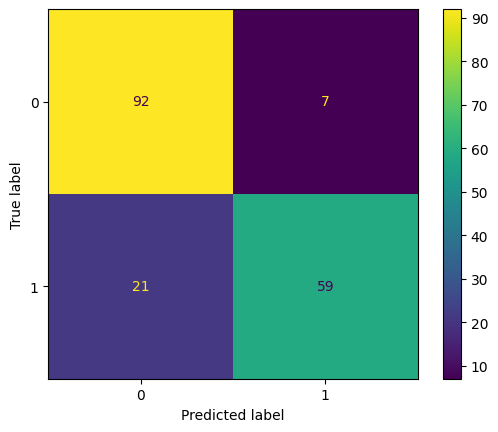

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

# 5. Grid Search 

We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [47]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
Rf_classifier = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = Rf_classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [48]:
# Fit the grid search to the data
grid_search.fit(scaled_X_train,y_train);

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total 

In [49]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

# 6. Grid Search Evaluation 

In [50]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [51]:
Rf_grid_best = RandomForestClassifier(random_state=42, n_estimators=100,
                                       min_samples_split=12, min_samples_leaf=3,
                                       max_depth=80, bootstrap=True)
Rf_grid_best.fit(scaled_X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,80
,min_samples_split,12
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_pred= Rf_grid_best.predict(scaled_X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8268156424581006


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        99
           1       0.89      0.70      0.78        80

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179



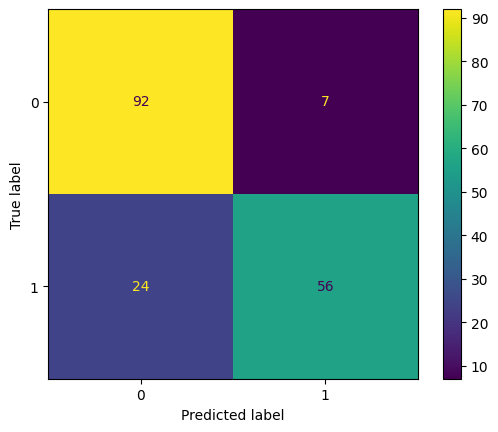

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()